In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [41]:
df = pd.read_csv('Cleaned_Data_final.csv')

### EXPLORATORY DATA ANALYSIS

In [42]:
df.describe()

,Rating,Founded,size_desc,age,Per_Hour,EPS,min_salary,max_salary,average_salary,same_loc,python,Masters,R,SQL,spark,aws,excel,total_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,3869.545822,48.456873,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,0.528302,0.339623,0.002695,0.512129,0.225067,0.237197,0.522911,1.053908
std,0.801210,497.183763,1521.495868,53.900445,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,0.499535,0.473901,0.051882,0.500190,0.417908,0.425651,0.499812,1.384239
min,-1.000000,-1.000000,407.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,2801.000000,13.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,3731.000000,26.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,2007.000000,4740.000000,61.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000
max,5.000000,2019.000000,10051.000000,278.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


<AxesSubplot:>

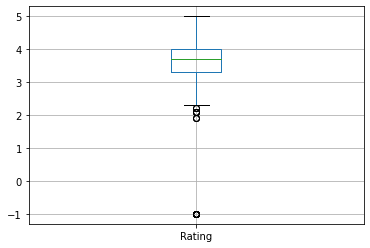

In [43]:
df.boxplot(column = 'Rating') # outliers present where then rating has been

<AxesSubplot:>

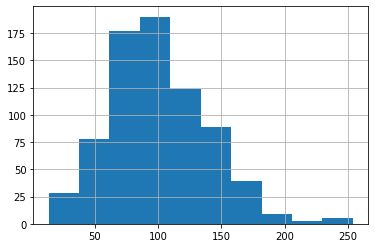

In [44]:
df['average_salary'].hist() 

<AxesSubplot:>

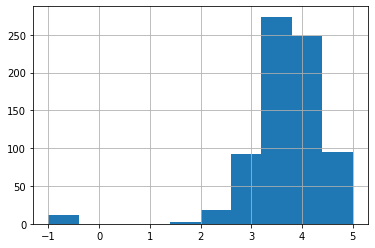

In [45]:
df['Rating'].hist() # more likely left skewed

<AxesSubplot:>

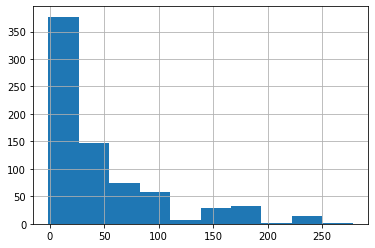

In [46]:
df['age'].hist() # more like right skewed and seems like it follows an exponential pattern

<AxesSubplot:>

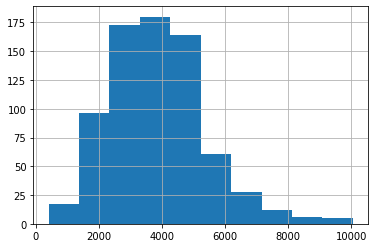

In [47]:
df.size_desc.hist() # more normally distributed

<AxesSubplot:>

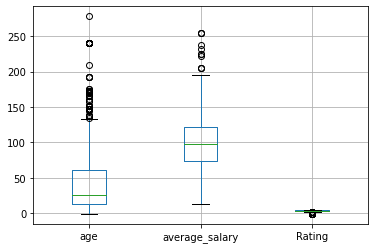

In [48]:
df.boxplot(column = ['age','average_salary','Rating']) # so a lot of outliers present with some old companies and in average salary

In [49]:
df[['age','average_salary','Rating','size_desc','total_comp']].corr()

,age,average_salary,Rating,size_desc,total_comp
age,1.000000,0.019492,0.024665,0.164461,0.128272
average_salary,0.019492,1.000000,0.013492,0.078808,0.093813
Rating,0.024665,0.013492,1.000000,-0.012281,0.027190
size_desc,0.164461,0.078808,-0.012281,1.000000,0.104620
total_comp,0.128272,0.093813,0.027190,0.104620,1.000000


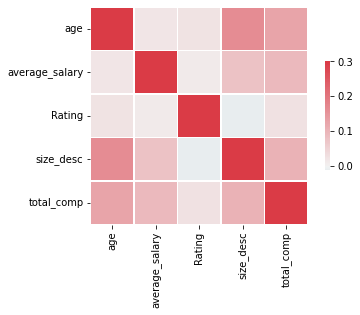

In [50]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','average_salary','Rating','size_desc','total_comp']].corr(), vmax=0.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('plot1.png',dpi=100)

In [51]:
categorical_data =  df[['Location','Headquarters','Size','Type of ownership','Industry','Sector',
                       'Revenue','comp_text','state','same_loc','python', 'R', 'spark', 'aws',
       'excel','jobs_cleaned', 'position_level']]

graph for Location: total = 20


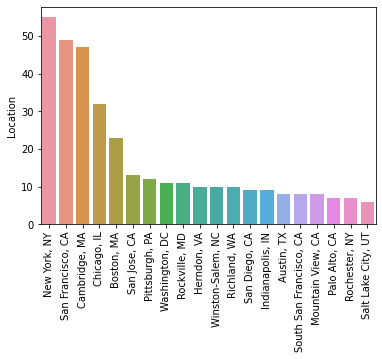

graph for Revenue: total = 14


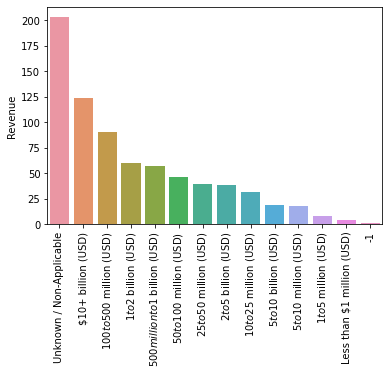

graph for comp_text: total = 20


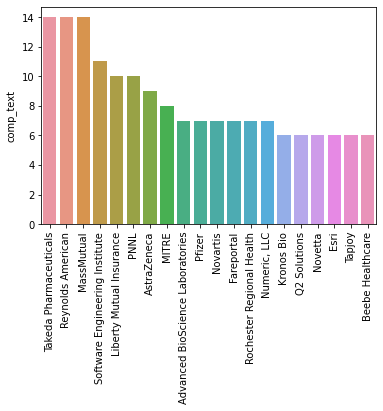

In [52]:
# df[['average_salary','Location']].hist()
# lot of job postings from New york and a lot of head quarters are in new york as well.
for i in categorical_data[['Location','Revenue','comp_text']].columns:
    data_point = categorical_data[i].value_counts()[:20]
    print("graph for %s: total = %d" %(i ,len(data_point)))
    figure = sns.barplot(x = data_point.index, y = data_point)
    figure.set_xticklabels(figure.get_xticklabels(), rotation = 90)
    plt.show()

Plot for number of jobs on the basis of Location: total = 20


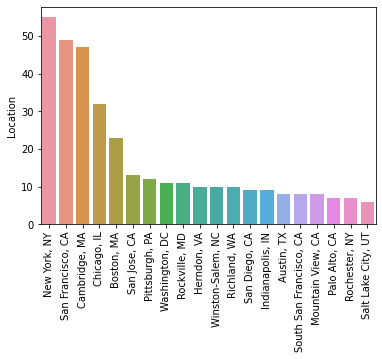

In [53]:
data_point = categorical_data['Location'].value_counts()[:20]
print("Plot for number of jobs on the basis of %s: total = %d" %('Location' ,len(data_point)))
figure = sns.barplot(x = data_point.index, y = data_point)
figure.set_xticklabels(figure.get_xticklabels(), rotation = 90)
plt.savefig('plot2.png')

In [54]:
pd.pivot_table(df, index = 'jobs_cleaned',values ='average_salary')

,average_salary
jobs_cleaned,
data analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
machine learning engineer,126.431818
manager,84.022727
none,84.853261


Plot for number of jobs on the basis of Sector: total = 20


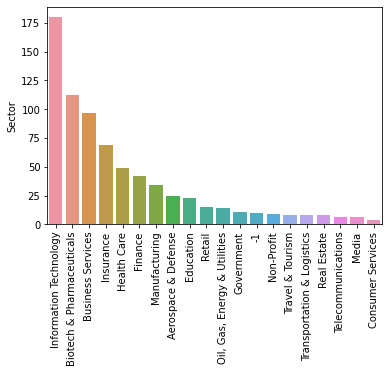

In [55]:
data_point = categorical_data['Sector'].value_counts()[:20]
print("Plot for number of jobs on the basis of %s: total = %d" %('Sector' ,len(data_point)))
figure = sns.barplot(x = data_point.index, y = data_point)
figure.set_xticklabels(figure.get_xticklabels(), rotation = 90)
plt.savefig('plot3.png')

Plot for number of jobs on the basis of jobs_cleaned: total = 7


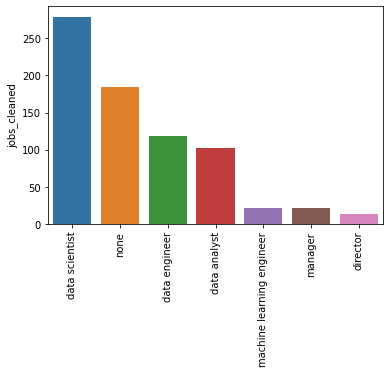

In [56]:
data_point = categorical_data['jobs_cleaned'].value_counts()[:20]
print("Plot for number of jobs on the basis of %s: total = %d" %('jobs_cleaned' ,len(data_point)))
figure = sns.barplot(x = data_point.index, y = data_point)
figure.set_xticklabels(figure.get_xticklabels(), rotation = 90)
plt.savefig('plot4.png')

Plot for number of jobs on the basis of Revenue: total = 14


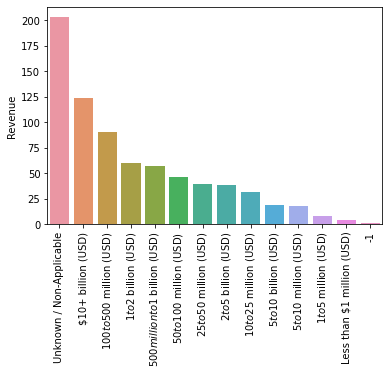

In [57]:
data_point = categorical_data['Revenue'].value_counts()[:20]
print("Plot for number of jobs on the basis of %s: total = %d" %('Revenue' ,len(data_point)))
figure = sns.barplot(x = data_point.index, y = data_point)
figure.set_xticklabels(figure.get_xticklabels(), rotation = 90)
plt.savefig('plot5.png')

In [58]:
pd.pivot_table(df, index = ['state','jobs_cleaned'],values = 'average_salary', aggfunc = 'count').sort_values('average_salary',ascending=False)

,,average_salary
state,jobs_cleaned,
CA,data scientist,68
MA,none,46
NY,data scientist,40
MA,data scientist,30
CA,none,27
...,...,...
RI,data analyst,1
PA,data engineer,1
LA,data analyst,1


In [59]:
# DC is leading in providing better salaries as compared to state new york
pd.pivot_table(df[df['jobs_cleaned'] == 'data scientist'], index = 'state', values='average_salary').sort_values('average_salary', ascending = False)

,average_salary
state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [60]:
new_df = df[['Rating','Industry','Sector','Revenue','total_comp','Per_Hour','EPS','python','R','spark', 'aws','excel', 'Type of ownership','average_salary']]

In [61]:
for x in new_df.columns:
    print(x)
    if(x != 'average_salary'):
        print(pd.pivot_table(new_df, index=x, values='average_salary').sort_values('average_salary', ascending = False))
    else:
        break

Rating
        average_salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 3.2        105.500000
 4.0        105.340426
 3.5        104.897959
 3.7        104.131148
 4.7        103.983871
 4.3        102.468750
 3.3        101.858974
 4.2        100.442308
 2.2         97.750000
 4.6         97.250000
 3.8         96.811475
 2.1         95.900000
 3.4         93.011364
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.467391
 2.8         83.928571
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286
Industry
                                          average_salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & Distribution      146.0000

In [62]:
pd.pivot_table(new_df, index='Revenue', columns='python',values='average_salary', aggfunc='count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


### WORDCLOUD

In [1]:
orig_text = " ".join(df['Job Description'])
#removing stop workds 
def remove(text):
    newtext =[]
    words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    for x in tokens:
        if x not in words and x.isalpha():
            newtext.append(x.lower())
    return newtext
final_words = remove(orig_text)
special_text = " ".join([y for y in final_words])
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, max_words = 1800).generate(special_text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud.png')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


NameError: name 'df' is not defined